# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [11]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

In [82]:
import scipy.stats as sps
coin = sps.bernoulli.rvs(p=0.5)

def uniform_custom(size, precision):
    count = np.prod(size)
    binary_numbers = np.random.choice([0, 1], size=(precision, count), p=[0.5, 0.5])
    powers_of_two = 2 ** np.arange(precision - 1, -1, -1).reshape(-1, 1)
    decimal_numbers = np.sum(binary_numbers * powers_of_two, axis=0)
    return decimal_numbers.reshape(size)

def normal_custom(size=1, loc=0, scale=1, precision=30):
    u1 = uniform(size, precision)
    u2 = uniform(size, precision)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    return z0 * scale + loc


def expon_custom(size=1, lambd=1, precision=30):
    uniform_numbers = uniform(size, precision)
    return -1 / lambd * np.log(1 - uniform_numbers)


**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

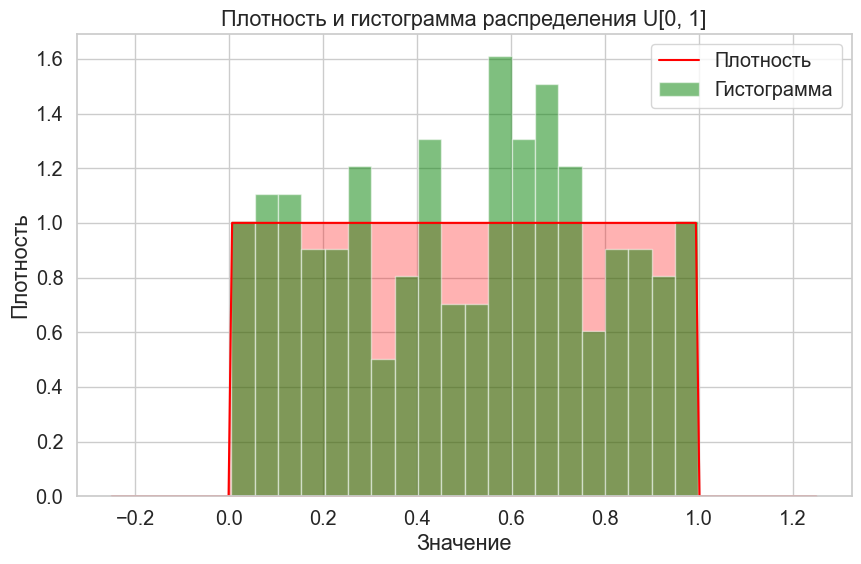

In [13]:
from scipy.stats import uniform

np.random.seed(0)
data = uniform.rvs(size=200)

x = np.linspace(-0.25, 1.25, 200)
pdf = uniform.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'r-', label='Плотность')
plt.fill_between(x, pdf, color='red', alpha=0.3)
plt.title('Плотность и гистограмма распределения U[0, 1]')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid(True)

plt.hist(data, bins=20, density=True, alpha=0.5, color='green', label='Гистограмма')

plt.legend()
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

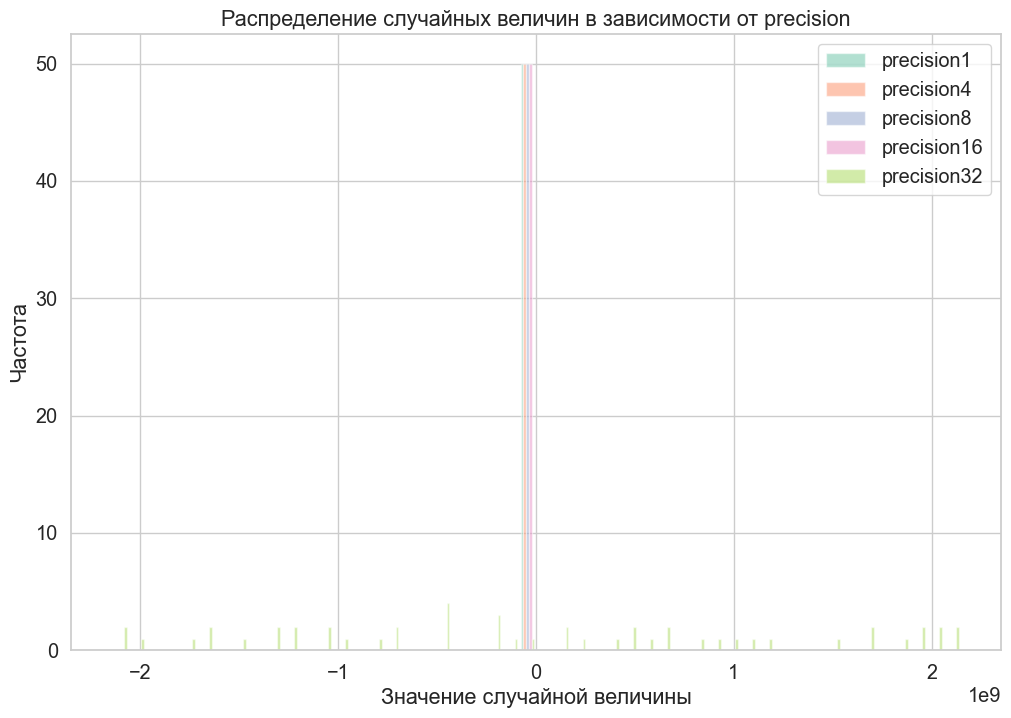

In [81]:
precisions = [1, 4, 8, 16, 32]

samples = {}
size=(50,)
plt.figure(figsize=(12, 8))
for precision in precisions:
    samples[f'precision{precision}'] = uniform_custom(size, precision)
plt.hist(pd.DataFrame(samples), bins=50, alpha=0.5)
plt.title('Распределение случайных величин в зависимости от precision')
plt.xlabel('Значение случайной величины')
plt.ylabel('Частота')
plt.legend(['precision1', 'precision4', 'precision8', 'precision16', 'precision32'])
plt.show()

> Чем меньше precision тем менее разрежены значения случайное величины

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

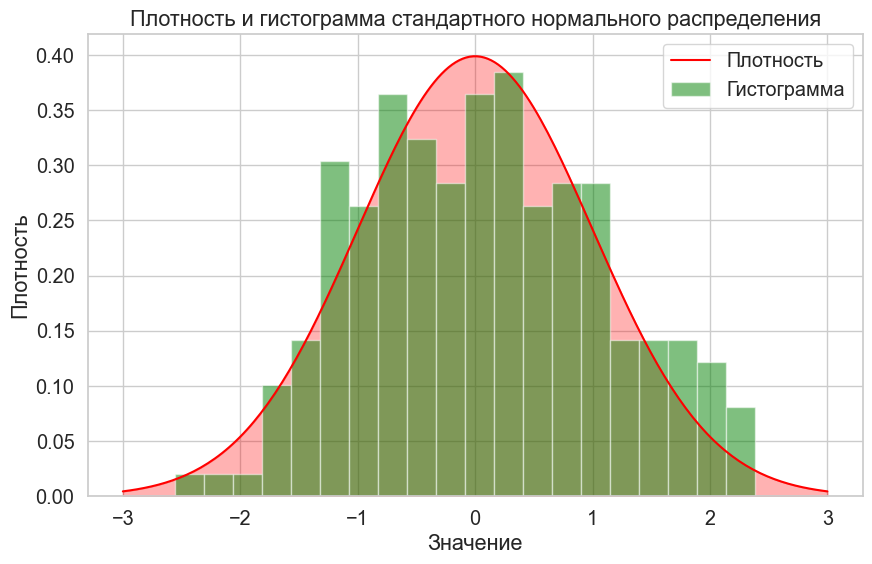

In [14]:
from scipy.stats import norm

np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=200)

x = np.linspace(-3, 3, 200)
pdf = norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'r-', label='Плотность')
plt.fill_between(x, pdf, color='red', alpha=0.3)
plt.title('Плотность и гистограмма стандартного нормального распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid(True)

plt.hist(data, bins=20, density=True, alpha=0.5, color='green', label='Гистограмма')

plt.legend()
plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

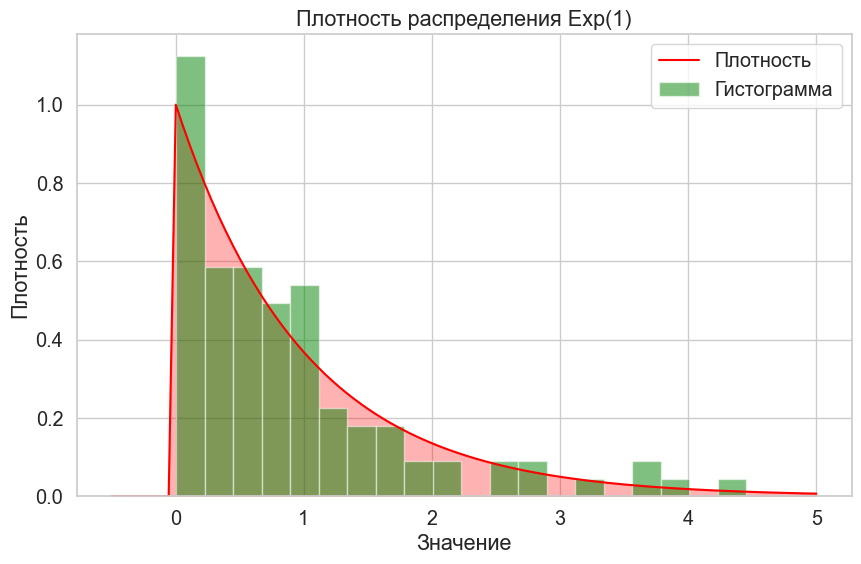

In [86]:
from scipy.stats import expon

np.random.seed(0)
data = np.random.exponential(scale=1, size=100)

x = np.linspace(-0.5, 5, 100)
pdf = expon.pdf(x, loc=0, scale=1)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'r-', label='Плотность')
plt.fill_between(x, pdf, color='red', alpha=0.3)
plt.title('Плотность распределения Exp(1)')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.grid(True)

plt.hist(data, bins=20, density=True, alpha=0.5, color='green', label='Гистограмма')

plt.legend()
plt.show()

**Выводы:**

Несложно понять, что значения случайных величин в пределе будут достигать плотностей функций распределений

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

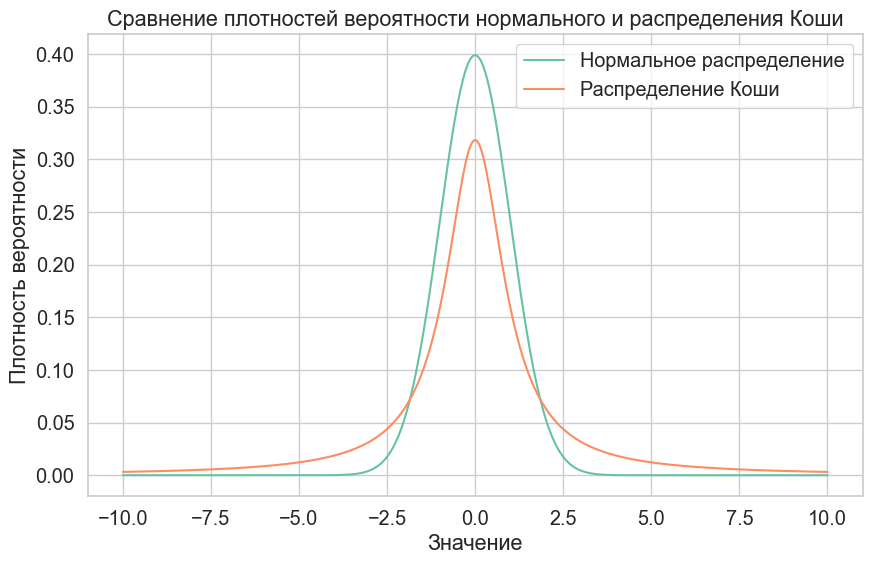

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy

x = np.linspace(-10, 10, 1000)

normal_pdf = norm.pdf(x, loc=0, scale=1)
cauchy_pdf = cauchy.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, normal_pdf, label='Нормальное распределение')
plt.plot(x, cauchy_pdf, label='Распределение Коши')
plt.title('Сравнение плотностей вероятности нормального и распределения Коши')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

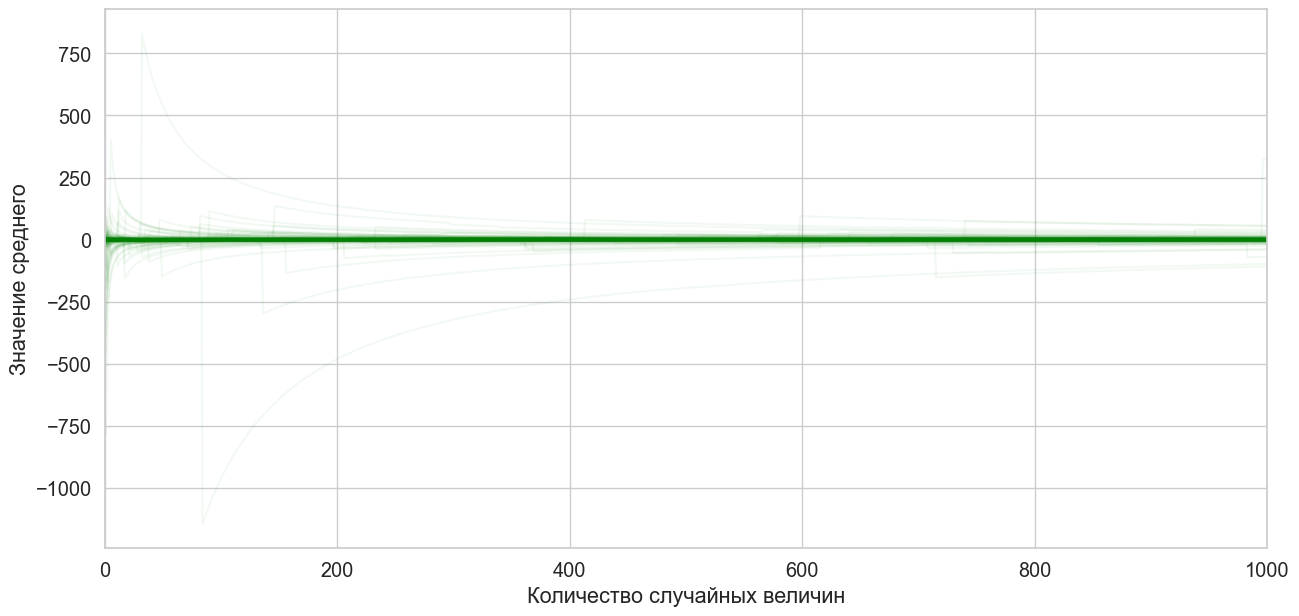

In [92]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.grid(True)
plt.xlim((0, size));

> Закон выполняется, но есть выбросы за счет маленьких значений случайных величин, но если убрать выбросы то да выполняется

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

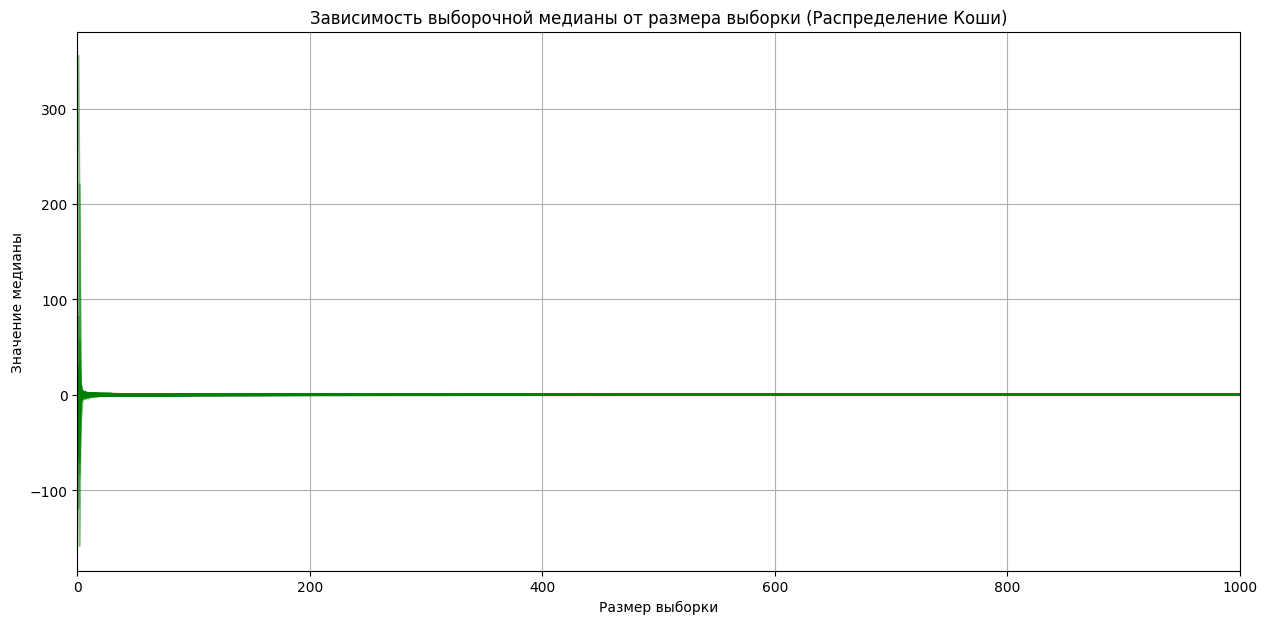

In [29]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = cauchy.rvs(size=(samples_count, size))
medians = []

for i in range(size):
    median = np.median(samples[:, :(i+1)], axis=1)
    medians.append(median)

plt.figure(figsize=(15, 7))
plt.plot(np.arange(1, size + 1), medians, color="green", alpha=0.5)
plt.xlabel("Размер выборки")
plt.ylabel("Значение медианы")
plt.xlim((0, size))
plt.title("Зависимость выборочной медианы от размера выборки (Распределение Коши)")
plt.grid(True)
plt.show()


**Вывод:**

Медиана стремится к сулчайной величине без выбросов в отличие от среднего для распределения Коши
При достаточно большом количестве случайных величин значение среднего не сильно отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

Минимальный размер выборки n: 356


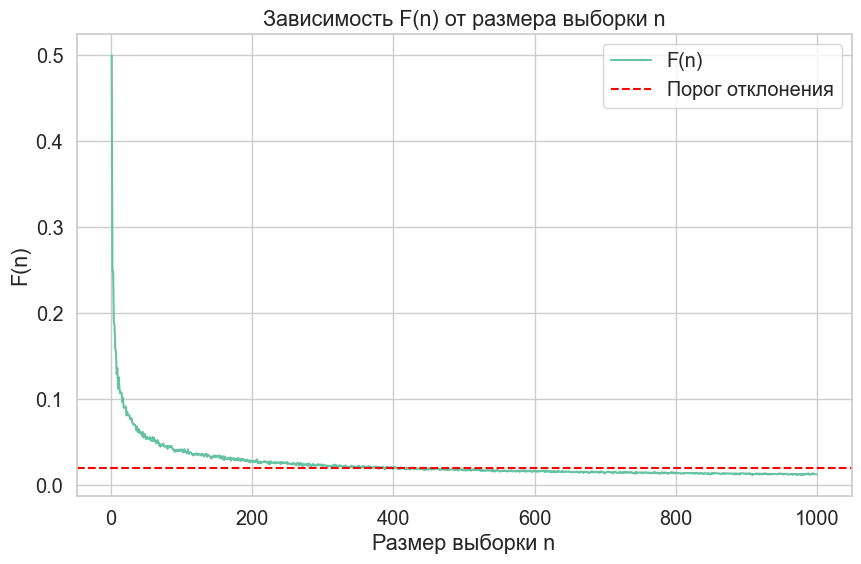

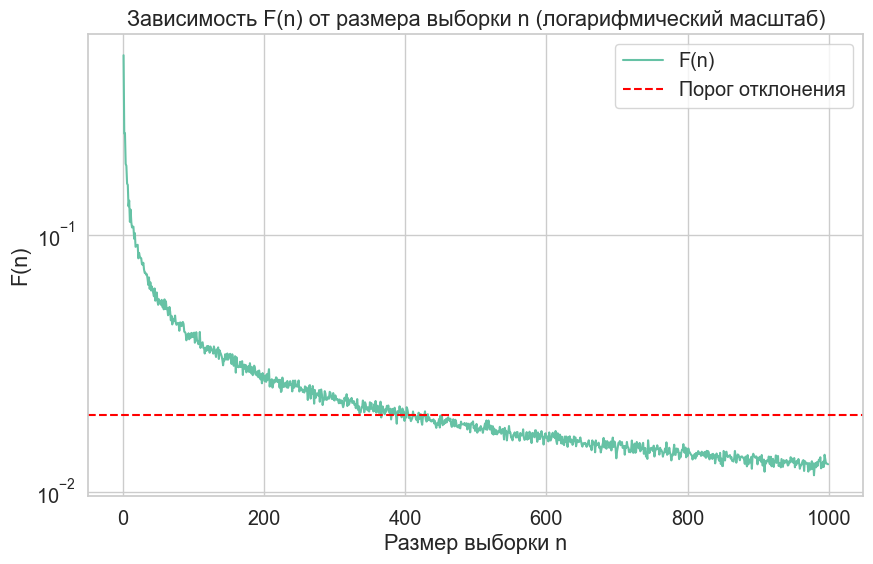

In [16]:
def F(n):
    samples = np.random.binomial(1, 0.5, size=(500, n))
    sample_means = samples.mean(axis=1)
    deviations = np.abs(sample_means - 0.5)
    return deviations.mean()

n = 1
while F(n) > 0.02:
    n += 1

print("Минимальный размер выборки n:", n)

import matplotlib.pyplot as plt

n_values = np.arange(1, 1000)
F_values = np.array([F(n_val) for n_val in n_values])

# Визуализация в обычном масштабе
plt.figure(figsize=(10, 6))
plt.plot(n_values, F_values, label='F(n)')
plt.axhline(0.02, color='r', linestyle='--', label='Порог отклонения')
plt.title('Зависимость F(n) от размера выборки n')
plt.xlabel('Размер выборки n')
plt.ylabel('F(n)')
plt.legend()
plt.grid(True)
plt.show()

# Визуализация в логарифмическом масштабе
plt.figure(figsize=(10, 6))
plt.semilogy(n_values, F_values, label='F(n)')
plt.axhline(0.02, color='r', linestyle='--', label='Порог отклонения')
plt.title('Зависимость F(n) от размера выборки n (логарифмический масштаб)')
plt.xlabel('Размер выборки n')
plt.ylabel('F(n)')
plt.legend()
plt.grid(True)
plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

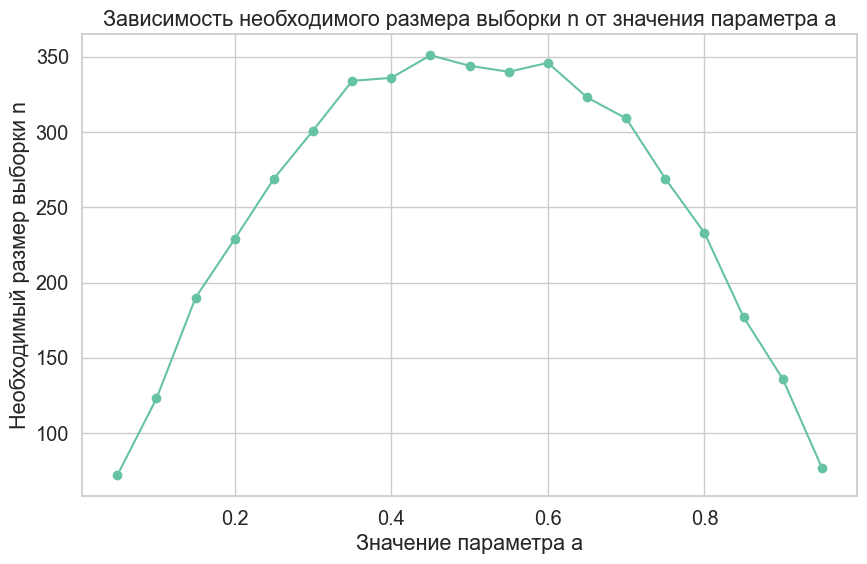

In [17]:
def calculate_n(a):
    def F(n):
        samples = np.random.binomial(1, a, size=(500, n))
        sample_means = samples.mean(axis=1)
        deviations = np.abs(sample_means - a)
        return deviations.mean()

    n = 1
    while F(n) > 0.02:
        n += 1

    return n

a_values = np.arange(0.05, 1, 0.05)
n_values = [calculate_n(a) for a in a_values]

plt.figure(figsize=(10, 6))
plt.plot(a_values, n_values, marker='o', linestyle='-')
plt.title('Зависимость необходимого размера выборки n от значения параметра a')
plt.xlabel('Значение параметра a')
plt.ylabel('Необходимый размер выборки n')
plt.grid(True)
plt.show()

**Выводы:**

Необходимый размер выборки должен быть больше если мат. ожидание стремится к 0.5, видимо, чтобы свести рандом к минимуму определять среднее с достаточной точностью. Также можно заметить что это стремится к нормальному распределению, учитывая маппинг)